# Regresión Lineal: Coste de un incidente de seguridad

En este ejercicio se explican los fundamentos básicos de la regresión lineal aplicada a un caso de uso sencillo relacionado con la Ciberseguridad.

## Enunciado del ejercicio

El ejercicio consiste en predecir el coste de un incidente de seguridad en base al número de equipos que se han visto afectados. El conjunto de datos es generado de manera aleatoria.

### 1. Generación del conjunto de datos

In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1) #lo ultimo es un error que añadimos

print("La longitud del conjunto de datos es:", len(X))

La longitud del conjunto de datos es: 100


### 2. Visualización del conjunto de datos

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

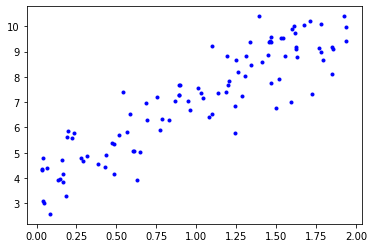

In [3]:
plt.plot(X, y, "b.") #plot es para definir el grafico
plt.show() #.show es para enseñarlo
#la varianza viene del error que hemos añadido antes

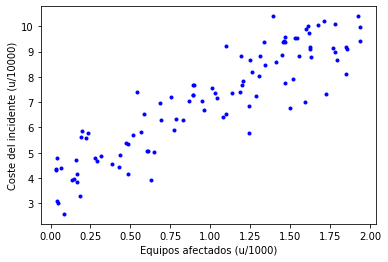

In [4]:
plt.plot(X, y, "b.")
plt.xlabel("Equipos afectados (u/1000)")
plt.ylabel("Coste del incidente (u/10000)")
plt.show()
#el intercepto que hemos puesto antes es el coste minimo (inicial) que tenemos dado cualquier problema

### 3. Modificación del conjunto de datos

In [5]:
import pandas as pd

In [6]:
data = {'n_equipos_afectados': X.flatten(), 'coste': y.flatten()} 
#nosotros con numpy tendriamos como una lista de listas, flatten lo convierte en una lista
df = pd.DataFrame(data)
df.head(10)

,n_equipos_afectados,coste
0,1.101275,6.530283
1,1.470157,7.760332
2,1.936207,9.429574
3,1.555486,8.819526
4,1.013574,7.541648
5,0.237664,5.797188
6,0.223158,5.572614
7,0.784002,6.325615
8,0.515900,5.716800
9,0.470974,5.397388


In [7]:
# Escalado del número de equipos afectados
df['n_equipos_afectados'] = df['n_equipos_afectados'] * 1000
df['n_equipos_afectados'] = df['n_equipos_afectados'].astype('int')
# Escalado del coste
df['coste'] = df['coste'] * 10000
df['coste'] = df['coste'].astype('int')
df.head(10)
#habria que estandarizar todo para que las betas fueran significativas
#si solo hay dos variables puede que no hiciera falta pues no habria confusion

,n_equipos_afectados,coste
0,1101,65302
1,1470,77603
2,1936,94295
3,1555,88195
4,1013,75416
5,237,57971
6,223,55726
7,784,63256
8,515,57167
9,470,53973


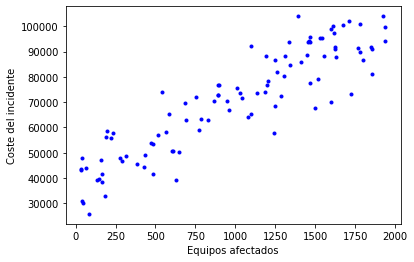

In [8]:
# Representación gráfica del conjunto de datos
plt.plot(df['n_equipos_afectados'], df['coste'], "b.")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente")
plt.show()

### 4. Construcción del modelo

In [9]:
from sklearn.linear_model import LinearRegression
#instanciamos (generamos un objeto (singleton)) la clase de LinearRegression

In [10]:
# Construcción del modelo y ajuste de la función hipótesis
lin_reg = LinearRegression()
lin_reg.fit(df['n_equipos_afectados'].values.reshape(-1, 1), df['coste'].values)
#.fit es el ajuste (entrenamiento) en todo lo que venga de scikitlearn
#al hacer .values le quitamos el pdseries (matriz de una sola columna) y lo hacemos un array (vector) porque si no podria interpretarlo como varias variables regresoras
#habria que shufflear para eviatr orden, algunso metodos son iterativos etc; habria que separar en conjunto de entrenamiento y de test

LinearRegression()

In [11]:
# Parámetro theta 0
lin_reg.intercept_

39113.06241041344

In [ ]:
# Parámetro theta 1
lin_reg.coef_

array([30.22393987])

Y = 37328.14 + 30.22*X

In [12]:
# Predicción para el valor mínimo y máximo del conjunto de datos de entrenamiento
X_min_max = np.array([[df["n_equipos_afectados"].min()], [df["n_equipos_afectados"].max()]])
y_train_pred = lin_reg.predict(X_min_max)

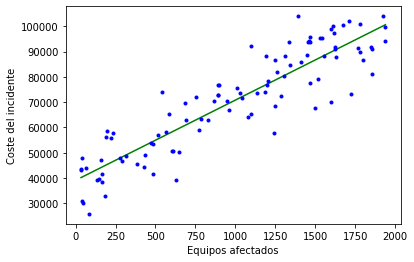

In [13]:
# Representación gráfica de la función hipótesis generada
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(df['n_equipos_afectados'], df['coste'], "b.")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente")
plt.show()

### 5. Predicción de nuevos ejemplos

In [14]:
x_new = np.array([[1300]]) # 1300 equipos afectados

# Predicción del coste que tendría el incidente
coste = lin_reg.predict(x_new) 

print("El coste del incidente sería:", int(coste[0]), "€")

El coste del incidente sería: 80309 €


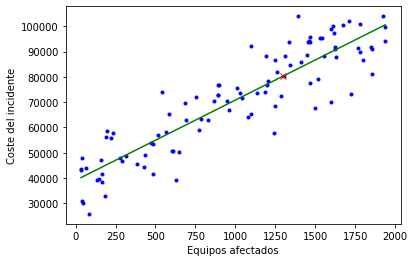

In [15]:
plt.plot(df['n_equipos_afectados'], df['coste'], "b.")
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(x_new, coste, "rx")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente")
plt.show()